# Rainbow Charts

http://www.binarytribune.com/forex-trading-indicators/rainbow-charts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = '^nsebank'
start = '2022-05-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-02 00:00:00+05:30,35627.601562,36235.250000,35618.199219,36163.750000,36163.328125,170200
2022-05-04 00:00:00+05:30,36266.148438,36309.300781,35127.851562,35264.550781,35264.140625,214600
2022-05-05 00:00:00+05:30,35705.351562,35934.851562,35133.800781,35232.851562,35232.441406,167300
2022-05-06 00:00:00+05:30,34569.101562,34797.949219,34353.199219,34591.199219,34590.796875,199200
2022-05-09 00:00:00+05:30,34091.750000,34554.351562,33927.199219,34275.398438,34275.000000,179900


In [3]:
# R=red, O=orange, Y=yellow, G=green, B=blue, I = indigo, and V=violet
df['Red'] = df['Adj Close'].rolling(2).mean()
df['Orange'] = df['Red'].rolling(2).mean()
df['Yellow'] = df['Orange'].rolling(2).mean() 
df['Green'] = df['Yellow'].rolling(2).mean()
df['Blue'] = df['Green'].rolling(2).mean()
df['Indigo'] = df['Blue'].rolling(2).mean()
df['Violet'] = df['Indigo'].rolling(2).mean()
df = df.dropna()

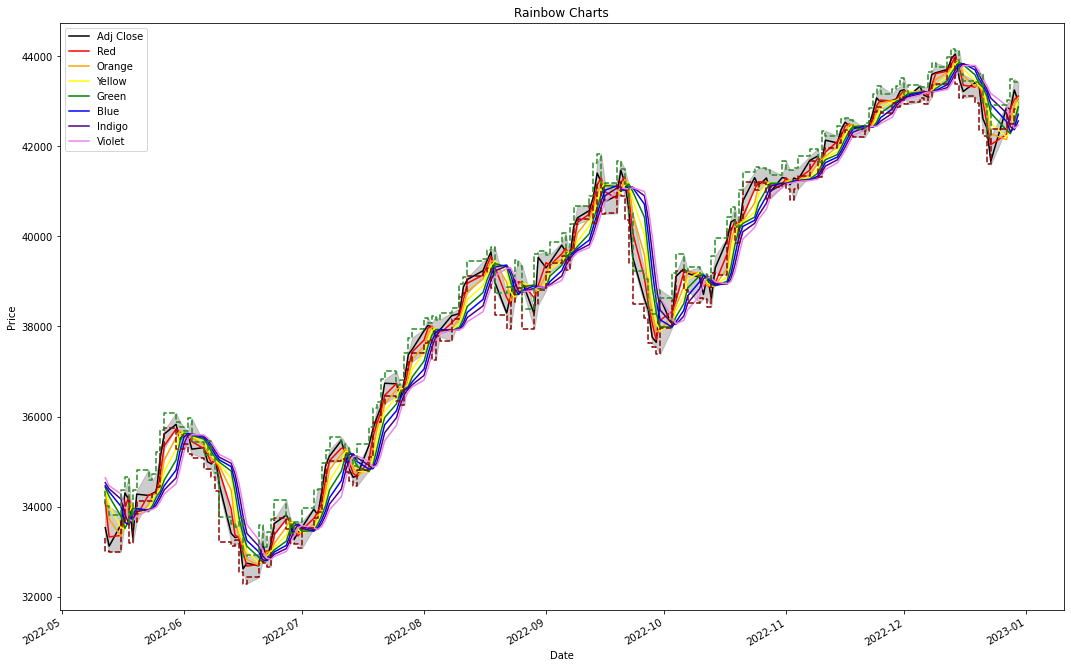

In [4]:
color = ['k','r', 'orange', 'yellow', 'g', 'b', 'indigo', 'violet']
df[['Adj Close','Red','Orange','Yellow','Green','Blue','Indigo','Violet']].plot(color=color, figsize=(18,12))
plt.fill_between(df.index, df['Low'], df['High'], color='grey', alpha=0.4)
plt.plot(df['Low'], c='darkred', linestyle='--', drawstyle="steps")
plt.plot(df['High'], c='forestgreen', linestyle='--', drawstyle="steps")
plt.title('Rainbow Charts')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Candlestick with Rainbow

In [5]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Red,Orange,Yellow,Green,Blue,Indigo,Violet,VolumePositive
0,19123.770833,34289.101562,34341.199219,33297.648438,33532.148438,33531.757812,382100,34112.251953,34349.874023,34416.466797,34430.438477,34461.074219,34530.354187,34638.317352,False
1,19124.770833,33925.949219,34002.199219,33007.898438,33121.351562,33120.964844,272700,33326.361328,33719.306641,34034.590332,34225.528564,34327.983521,34394.528870,34462.441528,False
2,19127.770833,33256.000000,33821.648438,33001.750000,33597.601562,33597.210938,195100,33359.087891,33342.724609,33531.015625,33782.802979,34004.165771,34166.074646,34280.301758,True
3,19128.770833,33796.199219,34366.050781,33680.601562,34301.898438,34301.500000,161500,33949.355469,33654.221680,33498.473145,33514.744385,33648.773682,33826.469727,33996.272186,True
4,19129.770833,34448.199219,34655.800781,34134.699219,34163.699219,34163.300781,146800,34232.400391,34090.877930,33872.549805,33685.511475,33600.127930,33624.450806,33725.460266,False


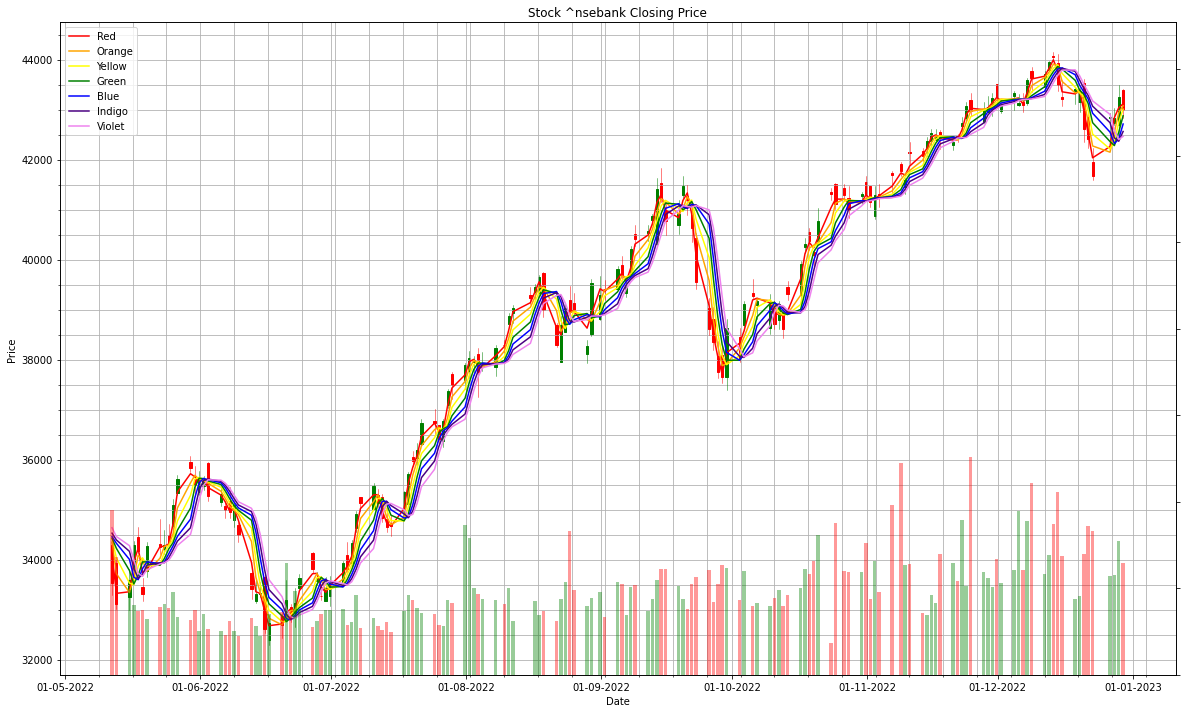

In [7]:
from mpl_finance import candlestick_ohlc

fig, ax1 = plt.subplots(figsize=(20,12))
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
#colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']
#labels = ['Red', 'Orange', 'Yellow', 'Green', 'Blue', 'Indigo', 'Violet']
for i in dfc[['Red', 'Orange', 'Yellow', 'Green', 'Blue', 'Indigo', 'Violet']]:
    ax1.plot(dfc['Date'], dfc[i], color=i, label=i)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.legend(loc='best')